In [36]:
import pandas as pd
import numpy as np
#IMPORT DATA
data = pd.read_csv(r'C:\CodeCool\data analisys techniques\superstore-python-anitaafeher\data.csv', delimiter=',')
df = pd.DataFrame(data)
df.set_index('Row ID', drop='index', inplace=True)
#df

In [37]:
#IMPORT DATA
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True) #making sure Order Date is datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True) #making sure Ship Date is datetime
# fix incorrect years
df['Ship Date'] = df.apply(
    lambda row: row['Order Date'] if row['Ship Date'] < row['Order Date'] else row['Ship Date'], axis=1)
df['Ship Date'] = df.apply(
    lambda row: row['Order Date'] + pd.Timedelta(days=1) if row['Ship Date'] <= row['Order Date'] else row['Ship Date'], axis=1)

df['Year'] = df['Order Date'].dt.year #Year column
df['Days to Ship'] = (df['Ship Date'] - df['Order Date']).dt.days
#mismatched_dates = df[df['Ship Date'] < df['Order Date']]
#print(mismatched_dates)
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Days to Ship
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2020-152156,2022-11-08,2022-11-09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2022,1
2,CA-2020-152156,2022-11-08,2022-11-09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2022,1
3,CA-2020-138688,2022-06-12,2022-06-13,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2022,1
4,US-2019-108966,2021-10-11,2021-10-12,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2021,1
5,US-2019-108966,2021-10-11,2021-10-12,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2018-110422,2020-01-21,2020-01-22,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2020,1
9991,CA-2021-121258,2023-02-26,2023-02-27,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2023,1
9992,CA-2021-121258,2023-02-26,2023-02-27,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2023,1


In [38]:
#SUMMARY DATA
total_sales = df['Sales'].sum()
total_sales_millified = "${:,.1f}M".format(total_sales/1_000_000)

total_profit = df['Profit'].sum()
total_profit_millified = "${:,.1f}k".format(total_profit/1_000)

number_of_orders = df['Order ID'].nunique()

print(total_sales_millified)
print(total_profit_millified)
print(number_of_orders)

$2.3M
$286.4k
5009


In [39]:
#TOP 10 PRODUCTS BY SALES
top_ten_sales = df.groupby('Product Name')[['Sales']].sum()
top_ten_product_sales = top_ten_sales.sort_values('Sales', ascending=False).head(10)
#top_ten_product_sales


In [40]:
#TOP 10 PRODUCTS BY PROFIT
top_ten_profit = df.groupby('Product Name')[['Profit']].sum()
top_ten_product_profit = top_ten_profit.sort_values('Profit', ascending=False).head(10)
#top_ten_product_profit

In [41]:
#AVERAGE SHIPPING DAYS
average_shipping = df['Days to Ship'].mean()
min_days = df['Days to Ship'].min()
max_days = df['Days to Ship'].max()
average_shipping

np.float64(1.0)

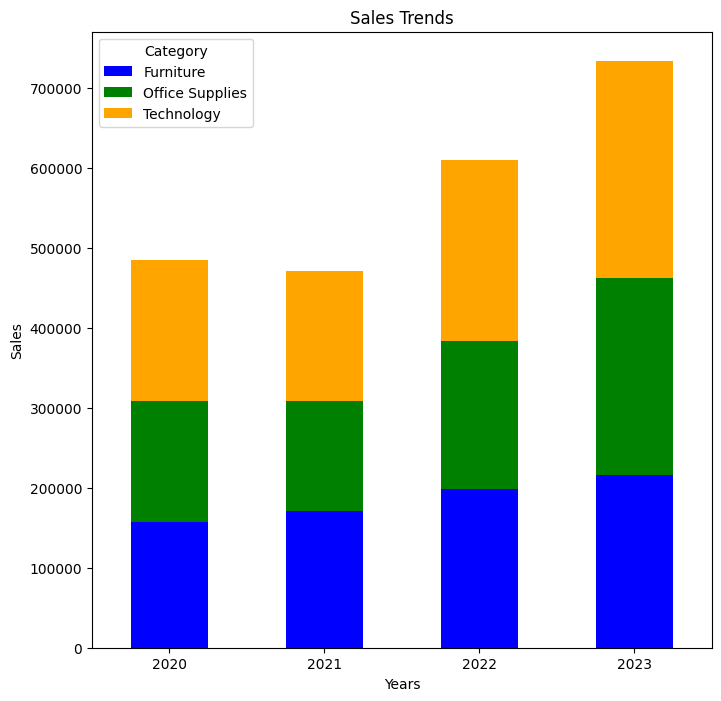

In [64]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

sales_trend = df.groupby(['Category', 'Year'])['Sales'].sum().reset_index()
sales_pivot = pd.pivot_table(sales_trend, values='Sales', index='Year', columns='Category')

fig3, ax3 = plt.subplots(figsize=(8,8))
sales_pivot.plot.bar(stacked= True, color=['blue', 'green', 'orange'], ax=ax3)
ax3.set_title('Sales Trends')
ax3.set_xlabel('Years')
ax3.set_ylabel('Sales')
ax3.legend(title='Category')
ax3.tick_params(axis='x', rotation=0)
plt.show()